### Import modules

In [7]:
import networkx as nx

from agents import doubling_agent, local_ts_agent, local_ucb_agent
from graph_bandit_helper_tools import testQLearning,return_graph,draw_graph
from core import train_agent

import numpy as np
from functools import partial

import pickle as pkl

from matplotlib import pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

SEED = 181731

In [16]:
from agents import get_ucb
def direct_agent(env):
    ucb = get_ucb(env)
    
    # Determine the destination node.
    dest = np.argmax(ucb)
    
    # Travel to the node with the highest UCB via the path of the shortest length
    next_path = nx.shortest_path(env.G,env.state,dest)
    if len(next_path)==1:
        env.step(dest)
    else:
        for s in next_path[1:]:
            env.step(s)

 
    target_count = 0+env.nodes[env.state]['n_visits']-1
    # Keep sampling the best UCB node until its number of samples doubles
    for _ in range(target_count):
        env.step(env.state)

In [19]:
def plotRegrets(allRegrets, titles=None, save_fig=None):
    """
    param allRegrets: list of dictionaries of regrets(samples, time_steps) for various algorithms and runs
    """
    nPlots = len(allRegrets)
    sns.set()
    
    labels = {'greedy': 'Local $\epsilon$-greedy', 'thompson': 'Local TS', 'UCB': 'Local UCB','Q_learning': 'Q-learning',\
              'Our Algorithm':'Our Algorithm','Direct':'Direct SP'}
    styles = {'greedy': 'dashed', 'thompson': 'dashed', 'UCB': 'dashed','Q_learning': 'dotted',\
              'Our Algorithm':'solid','Direct':'dotted'}
    colors = {'greedy': 'b', 'thompson': 'r', 'UCB': 'g','Q_learning': 'r',\
              'Our Algorithm':'k','Direct':'y'}
    keys = allRegrets[0].keys()
    

    if nPlots == 1:
        regrets = allRegrets[0]
        for i, key in enumerate(keys):
            regret = regrets[key]
            regret = np.cumsum(regret, axis=1)
            regret = np.mean(regret, axis=0)
            plt.plot([i for i in range(1,len(regret)+1)],regret, c=colors[key], linestyle = styles[key], label=labels[key],\
                    linewidth=3)
        if titles is not None:    
            plt.title(titles[0])
    else:
        fig, axes = plt.subplots(2, 3, figsize=(17,10))
        for j, regrets in enumerate(allRegrets):
            for i, key in enumerate(regrets.keys()):
                regret = regrets[key]
                regret = np.cumsum(regret, axis=1)
                df = pd.DataFrame(np.transpose(regret))
                df.columns = [labels[key] for _ in range(regret.shape[0])]
                if j<3:
                    sns.lineplot(ax = axes[0,j], data=df, ci=None, palette=[colors[key]])
                    axes[0,j].set_title(titles[j])
                else:
                    sns.lineplot(ax = axes[1,j%3], data=df, ci=None, palette=[colors[key]])
                    axes[1,j%3].set_title(titles[j])
    plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.45), fontsize=16)
    plt.xlabel('$t$', fontsize=20)
    plt.ylabel('Expected regret', fontsize=20)
    plt.tick_params(labelsize=20)
    plt.style.use('seaborn-dark-palette')
    if save_fig is not None:
        plt.savefig('Figures/'+save_fig, bbox_inches = 'tight')
    plt.show()

### Define parameters

Define the following parameters:  
$\texttt{T}:$ game length  
$\texttt{n_samples}:$ number of games to run   
$\texttt{episodes}:$ number of episodes; Let this be 1 for now 
$\texttt{n_nodes}:$ number of nodes in graph. 
$\texttt{mu_size}:$ the node means are drawn as $\mu\sim \texttt{mu_size}\times \mathcal{N}(0,1)$   
$\texttt{sigma_size}:$ the node standard deviations are set to $\texttt{sigma_size}$ 
$\texttt{epsilon}:$ exploration parameter (only applicable for Q-learning algorithms)  
$\texttt{epsilon_discount}:$ exploration discount parameter (only applicable for Q-learning algorithms)  
$\texttt{algorithms}:$ the algorithms to run. 


 



In [5]:
n_samples = 20
episodes = 1
n_nodes = 10
mu_size = 1
sigma_size = 1

# For Q-learning

epsilon = 0.9
epsilon_discount=0.99

init_node = 0

# Line graph

C:\Miniconda3\envs\data_analyze\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Miniconda3\envs\data_analyze\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


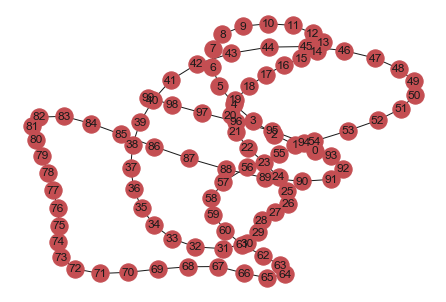

In [75]:
T = 15000

np.random.seed(SEED)
n_nodes = 100
G = return_graph('line', n_nodes)
draw_graph(G)

means = np.random.uniform(low=0.5,high=9.5,size=(n_samples,n_nodes))

In [76]:
line_regrets = {}

In [77]:
line_regrets['Our Algorithm'] = train_agent(n_samples,T,G,means, init_node,doubling_agent)



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:19<00:00,  1.03it/s]


In [78]:
line_regrets['Direct'] = train_agent(n_samples,T,G,means, init_node,direct_agent)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.36it/s]


In [79]:
with open('Data/line_direct.pkl', 'wb') as file:
    pkl.dump(line_regrets,file)

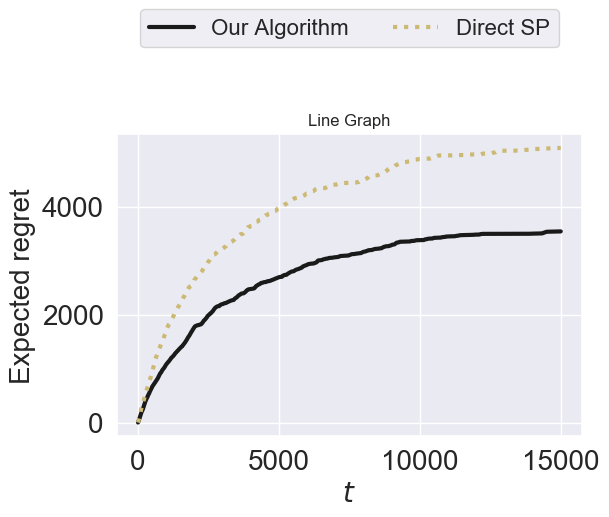

In [80]:
plt.figure(dpi=100)

plotRegrets([line_regrets], titles=['Line Graph'])

# Circle graph

C:\Miniconda3\envs\data_analyze\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Miniconda3\envs\data_analyze\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


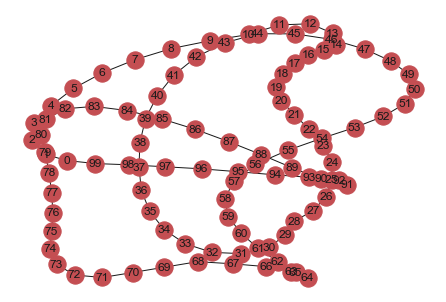

In [69]:
T = 15000

np.random.seed(SEED)
n_nodes = 100
G = return_graph('circle', n_nodes)
draw_graph(G)


means = np.random.uniform(low=0.5,high=9.5,size=(n_samples,n_nodes))

In [70]:
line_regrets = {}

In [71]:
line_regrets['Our Algorithm'] = train_agent(n_samples,T,G,means, init_node,doubling_agent)


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.06it/s]


In [72]:
line_regrets['Direct'] = train_agent(n_samples,T,G,means, init_node,direct_agent)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.13it/s]


In [73]:
with open('Data/circle_direct.pkl', 'wb') as file:
    pkl.dump(line_regrets,file)

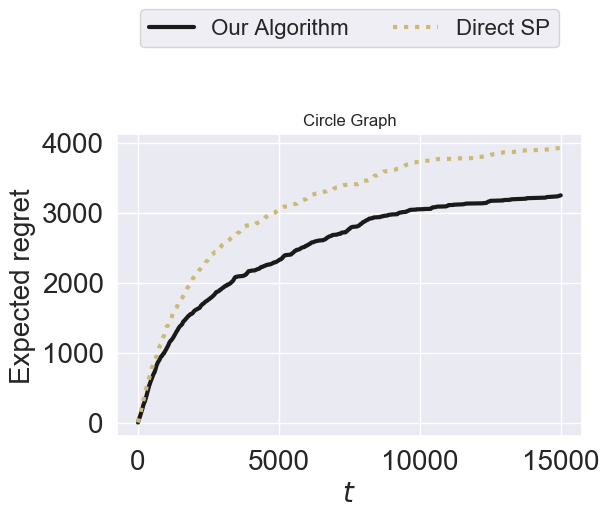

In [74]:
plt.figure(dpi=100)

plotRegrets([line_regrets], titles=['Circle Graph'])

# Tree graph

C:\Miniconda3\envs\data_analyze\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Miniconda3\envs\data_analyze\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


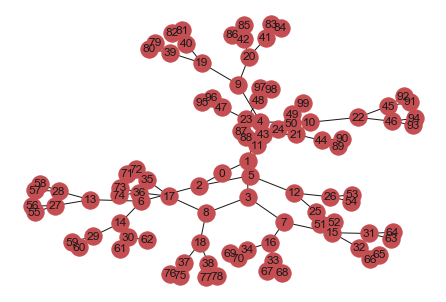

In [41]:
T = 15000

np.random.seed(SEED)
n_nodes = 100
G = return_graph('tree', n_nodes,n_children = 2)
draw_graph(G)

In [42]:
np.random.seed(SEED)
means = np.random.uniform(low=0.5,high=9.5,size=(n_samples,n_nodes))

In [43]:
line_regrets = {}

In [ ]:
line_regrets['Our Algorithm'] = train_agent(n_samples,T,G,means, init_node,doubling_agent)


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.86it/s]


In [45]:
line_regrets['Direct'] = train_agent(n_samples,T,G,means, init_node,direct_agent)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.57it/s]


In [46]:
with open('Data/tree_direct.pkl', 'wb') as file:
    pkl.dump(line_regrets,file)

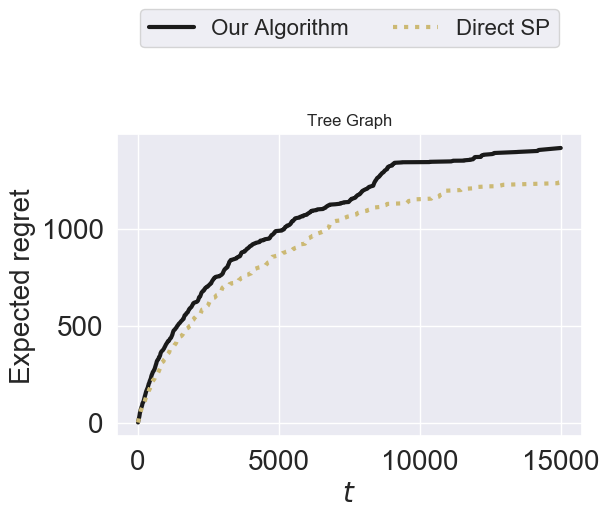

In [47]:
plt.figure(dpi=100)

plotRegrets([line_regrets], titles=['Tree Graph'])

# Grid graph

C:\Miniconda3\envs\data_analyze\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Miniconda3\envs\data_analyze\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


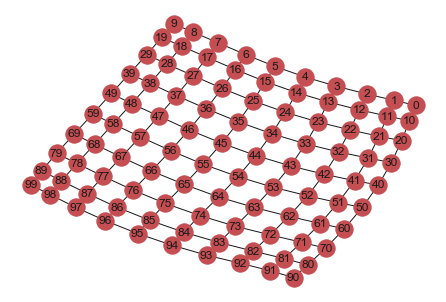

In [48]:
T = 15000

np.random.seed(SEED)
n_nodes = 100
G = return_graph('grid',n_nodes)
draw_graph(G)

In [49]:
np.random.seed(SEED)
means = np.random.uniform(low=0.5,high=9.5,size=(n_samples,n_nodes))

In [50]:
line_regrets = {}

In [51]:
line_regrets['Our Algorithm'] = train_agent(n_samples,T,G,means, init_node,doubling_agent)


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]


In [52]:
line_regrets['Direct'] = train_agent(n_samples,T,G,means, init_node,direct_agent)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.70it/s]


In [53]:
with open('Data/grid_direct.pkl', 'wb') as file:
    pkl.dump(line_regrets,file)

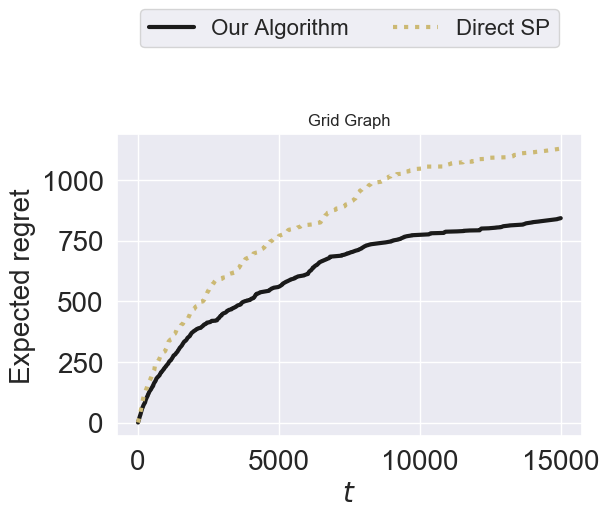

In [54]:
plt.figure(dpi=100)

plotRegrets([line_regrets], titles=['Grid Graph'])

# Star graph

C:\Miniconda3\envs\data_analyze\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Miniconda3\envs\data_analyze\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


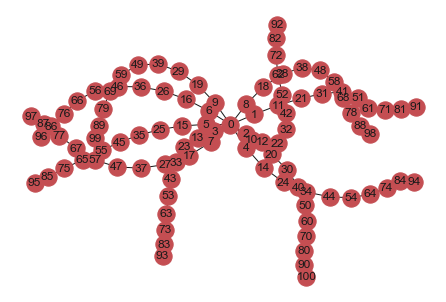

In [55]:
T = 15000

np.random.seed(SEED)


n_branches = 10
n_layers = 10

G = nx.Graph()

G.add_edge(0,0)
for l in range(n_layers):
    for b in range(n_branches):
        G.add_edge(max(b+1+(l-1)*n_branches,0),b+1+l*n_branches)

for i in G.nodes:
    G.add_edge(i,i)
    
# G = return_graph('star',10)
draw_graph(G)

n_nodes = G.number_of_nodes()

In [56]:
np.random.seed(SEED)
means = np.random.uniform(low=0.5,high=9.5,size=(n_samples,n_nodes))

In [57]:
line_regrets = {}

In [58]:
line_regrets['Our Algorithm'] = train_agent(n_samples,T,G,means, init_node,doubling_agent)


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.19it/s]


In [59]:
line_regrets['Direct'] = train_agent(n_samples,T,G,means, init_node,direct_agent)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.93it/s]


In [60]:
with open('Data/star_direct.pkl', 'wb') as file:
    pkl.dump(line_regrets,file)

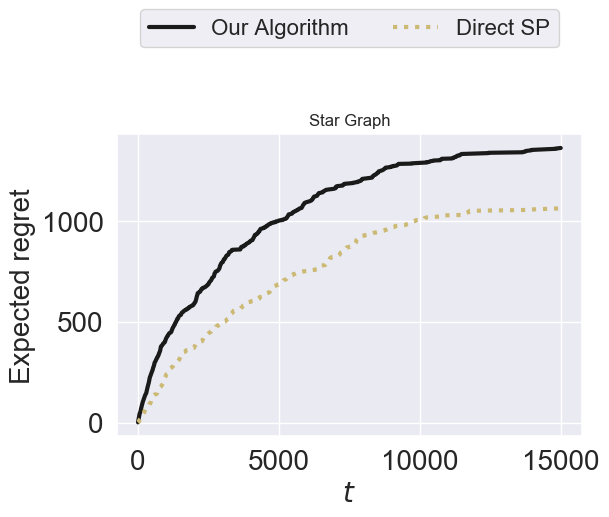

In [61]:
plt.figure(dpi=100)

plotRegrets([line_regrets], titles=['Star Graph'])